### Importing Requirments

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

### Importing Breast Cancer Dataset

In [2]:
data = load_breast_cancer(as_frame=True)
df = data.frame

In [3]:
df.head(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
X = df.drop(columns="target", axis=1)
y = df["target"]

### Label explanation

    1 --> Benign

    0 --> Malignant

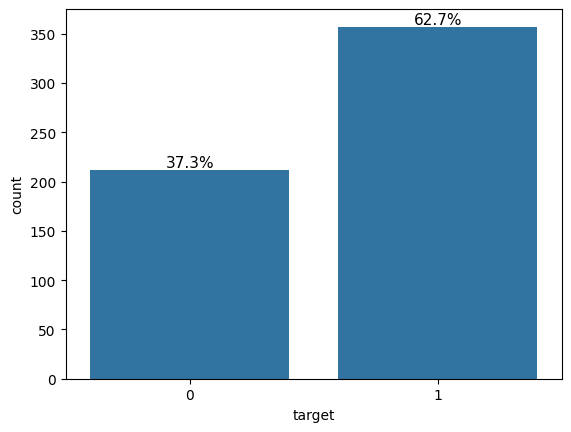

In [6]:
ax = sns.countplot(data=df, x="target")

total = len(df)
for i in ax.patches:
    count = i.get_height()
    percentage = f'{100 * count / total:.1f}%'
    a = i.get_x() + i.get_width() / 2
    b = i.get_height()
    ax.annotate(percentage, (a, b), ha='center', va='bottom', fontsize=11)

plt.show()

In [7]:
 #X = np.asarray(X)
 #y = np.asarray(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Grid Search Approach

In [9]:
model = SVC()

In [10]:
parameters = {
    "C":[1, 2, 5, 10],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}

In [11]:
grid_search = GridSearchCV(model, parameters, cv=5)

In [12]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [13]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 2, 'kernel': 'linear'}

In [14]:
hieghest_accuracy = grid_search.best_score_
hieghest_accuracy

np.float64(0.9582417582417582)

In [15]:
df_grid_search = pd.DataFrame(grid_search.cv_results_)

In [16]:
df_grid_search.head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.581761,0.240368,0.003519,0.002776,1,linear,"{'C': 1, 'kernel': 'linear'}",0.978022,0.945055,0.934066,0.956044,0.967033,0.956044,0.015541,2
1,0.001559,0.002707,0.002396,0.002960,1,poly,"{'C': 1, 'kernel': 'poly'}",0.934066,0.912088,0.835165,0.901099,0.934066,0.903297,0.036380,12
2,0.005774,0.002391,0.000000,0.000000,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.934066,0.923077,0.857143,0.901099,0.934066,0.909890,0.028991,11
3,0.006859,0.000448,0.002661,0.003261,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.472527,0.450549,0.483516,0.494505,0.450549,0.470330,0.017582,13
4,1.407858,0.496218,0.000230,0.000459,2,linear,"{'C': 2, 'kernel': 'linear'}",0.967033,0.945055,0.956044,0.956044,0.967033,0.958242,0.008223,1
5,0.004692,0.006147,0.000000,0.000000,2,poly,"{'C': 2, 'kernel': 'poly'}",0.934066,0.923077,0.868132,0.901099,0.945055,0.914286,0.027274,9
6,0.003197,0.003253,0.004309,0.005909,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.923077,0.934066,0.879121,0.912088,0.934066,0.916484,0.020382,7


In [17]:
grid_search_result = df_grid_search[["param_C","param_kernel","mean_test_score"]]

In [18]:
grid_search_result.sort_values("mean_test_score", ascending=False)

,param_C,param_kernel,mean_test_score
4,2,linear,0.958242
0,1,linear,0.956044
12,10,linear,0.953846
8,5,linear,0.953846
10,5,rbf,0.923077
9,5,poly,0.916484
6,2,rbf,0.916484
14,10,rbf,0.916484
5,2,poly,0.914286
13,10,poly,0.914286


###  Highest Accuracy = 95.8%
###  Best Parameters = {C : 2, kernel : linear}

# Random Search Approach

In [19]:
random_search = RandomizedSearchCV(model, parameters, cv=5)

In [20]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 2, 5, 10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [21]:
best_parameters = random_search.best_params_
best_parameters

{'kernel': 'linear', 'C': 2}

In [22]:
hieghest_accuracy = random_search.best_score_
hieghest_accuracy

np.float64(0.9582417582417582)

In [23]:
df_random_search = pd.DataFrame(random_search.cv_results_)

In [24]:
df_random_search.head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004151,0.001611,0.003775,0.002454,poly,10,"{'kernel': 'poly', 'C': 10}",0.912088,0.934066,0.890110,0.901099,0.934066,0.914286,0.017582,6
1,1.420357,0.496429,0.001633,0.002167,linear,2,"{'kernel': 'linear', 'C': 2}",0.967033,0.945055,0.956044,0.956044,0.967033,0.958242,0.008223,1
2,0.006545,0.000469,0.001657,0.001706,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.417582,0.362637,0.395604,0.395604,0.439560,0.402198,0.025631,9
3,0.006252,0.000382,0.002215,0.001282,sigmoid,2,"{'kernel': 'sigmoid', 'C': 2}",0.417582,0.417582,0.417582,0.439560,0.428571,0.424176,0.008791,8
4,0.003381,0.001825,0.002373,0.001815,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.934066,0.923077,0.857143,0.901099,0.934066,0.909890,0.028991,7
5,0.001797,0.001827,0.002367,0.002207,poly,5,"{'kernel': 'poly', 'C': 5}",0.912088,0.934066,0.879121,0.923077,0.934066,0.916484,0.020382,4
6,0.003814,0.002078,0.001395,0.001478,rbf,5,"{'kernel': 'rbf', 'C': 5}",0.923077,0.945055,0.890110,0.923077,0.934066,0.923077,0.018388,3


In [26]:
random_search_result = df_random_search[["param_C","param_kernel","mean_test_score"]]

In [27]:
random_search_result.sort_values("mean_test_score", ascending=False)

,param_C,param_kernel,mean_test_score
1,2,linear,0.958242
9,5,linear,0.953846
6,5,rbf,0.923077
5,5,poly,0.916484
7,10,rbf,0.916484
0,10,poly,0.914286
4,1,rbf,0.909890
3,2,sigmoid,0.424176
2,5,sigmoid,0.402198
8,10,sigmoid,0.395604


###  Highest Accuracy = 95.8%
###  Best Parameters = {C : 2, kernel : linear}